# The Repressilator
\begin{align}
\dot{X} = \frac{1}{1+Z^{n}} - \frac{X}{2} \\
\dot{Y} = \frac{1}{1+X^{n}} - \frac{Y}{2} \\
\dot{Z} = \frac{1}{1+Y^{n}} - \frac{Z}{2}
\end{align}

The repressilator is a artificially created system of genes, first described in the year 2000 within the paper [A synthetic oscillatory network of transcriptional regulators](https://www.nature.com/articles/35002125) by Elowitz and Leibler, which exhibits oscillatory behaviour in gene expression. This is done by clockwise repression of the respective proteins. This model is generally considered to be the starting point of the field of artificial life, as it first was able to create a model rivaling naturally occuring models such as the circadian rhythm. To this day this model is used, mostly in a modified form, in a variety of contexts, such as in the form of the segmentation clock, a model which can be used to describe the creation of vertebrae in an embryo, see for example [The Segmentation Clock: Converting Embryonic Time into Spatial Pattern](https://www.science.org/doi/10.1126/science.1085887)\\
This sheet focusses on the dynamics of the system, stability, bifurcation and such.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import fft

class calculator():
    def __init__(self, initial_values,t_max,exponent):
        self.X = 0
        self.Y=0
        self.Z=0
        self.t_max= t_max
        self.time = 0
        self.initial_values=initial_values
        self.exponent=exponent
        
    def __ODE(self,t,y):
        return [1/(1+y[2]**self.exponent) - y[0]/2 ,1/(1+y[0]**self.exponent) - y[1]/2 ,1/(1+y[1]**self.exponent) - y[2]/2]
    def calc(self):
        solution = solve_ivp(self.__ODE,[0,self.t_max],self.initial_values)
        self.X, self.Y, self.Z = solution.y
        self.time = solution.t

# Simulation of the model


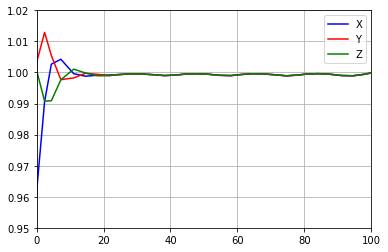

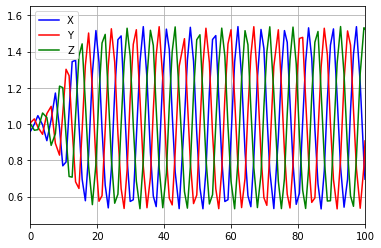

In [3]:

initial_values_a = [0.96,1,1]


model_a_2 = calculator(initial_values_a,100,2)
model_a_2.calc()

fig_a_2 ,axarr_a_2 = plt.subplots()
axarr_a_2.plot(model_a_2.time,model_a_2.X,'-b',label='X')
axarr_a_2.plot(model_a_2.time,model_a_2.Y,'-r',label='Y')
axarr_a_2.plot(model_a_2.time,model_a_2.Z,'-g',label='Z')
axarr_a_2.set_xlim([0,100])
axarr_a_2.set_ylim([0.95,1.02])
axarr_a_2.legend()
axarr_a_2.grid(True)

model_a_6 = calculator(initial_values_a,100,6)
model_a_6.calc()

fig_a_6, axarr_a_6 = plt.subplots()
axarr_a_6.plot(model_a_6.time,model_a_6.X,'-b',label='X')
axarr_a_6.plot(model_a_6.time,model_a_6.Y,'-r',label='Y')
axarr_a_6.plot(model_a_6.time,model_a_6.Z,'-g',label='Z')
axarr_a_6.set_xlim([0,100])
axarr_a_6.set_ylim([0.45,1.65])
axarr_a_6.legend()
axarr_a_6.grid(True)

# Analyzing stability
In the first part we see that the system goes from a stable fixpoint at $(1,1,1)$ to a stable limit cycle around said point.Further, we did additional simulations and found that for no parameter $n$, until the hopf bifurcation occurs, we do get no oscillation exceeding $X=1.4$ or going smaller than $X<0.6$. However choosing different starting values might change this. However this holds only true if we choose to observe $X$ in the region of $t>1000$, as for some values declining beats do occur, which may exceed these thresholds.

We therefore iterate over n in terms of one tenths and plot $0$ if no limit cycle appears, given our conditions or plot $1$ if it does. We hereby obtain:

<ipython-input-2-3c43ade6fe9c>:17: RuntimeWarning: invalid value encountered in double_scalars
  return [1/(1+y[2]**self.exponent) - y[0]/2 ,1/(1+y[0]**self.exponent) - y[1]/2 ,1/(1+y[1]**self.exponent) - y[2]/2]


Text(0.5, 0, 'n')

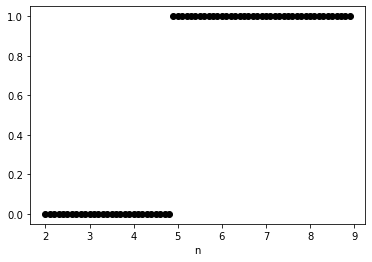

In [5]:

initial_values_b = [0.96,1,1]
aux_bifurcation=[]
aux_bifurcation_time = []

for i in range(70):
    model_b = calculator(initial_values_b, 4000, 2+(i/10))
    model_b.calc()
    for j in range(len(model_b.time)):
        if model_b.time[j]>2000:
            if model_b.X[j] >1.4 or model_b.X[j]<0.65:
                aux_bifurcation.append((i/10)+2)
                aux_bifurcation_time.append(j)
                break
            else:
                None
        else:
            None
            

aux_plot_bifurcation = []
for i in range(70):
    if 2+i/10<aux_bifurcation[0]:
        aux_plot_bifurcation.append(0)
    elif 2+i/10>=aux_bifurcation[0]:
        aux_plot_bifurcation.append(1)
        
fig_b , axarr_b = plt.subplots()
axarr_b.plot([2+i/10 for i in range(70)], aux_plot_bifurcation,'ok')
axarr_b.set_xlabel('n')

#hint: the plotting may take some time


We therefore see a bifurcation happening at n=4,9.
# Multistability of the system
Given the findings of stability theory(using lyapunov functions) the system should be multistable as:
\begin{align}
\lambda = -\frac{1}{2}- \frac{n}{4}e^{\frac{2\pi}{3}j} ; j\in \mathbb{C}
\end{align}
allows for 2 limit cycles with opposite orientation. We therefore need to see, whether there exists a limit cycle around our currently known one. As we have started with initial values "inside" the limit cycle and $(1,1,1)$ being our unstable fixpoint. We conclude that the possible other limit cycle has to be outside of our currently known one.
We therefore use initial values for $X$/$Y$/$Z$ exceeding our conidtions we set in part b, as well as use n > 4.9.

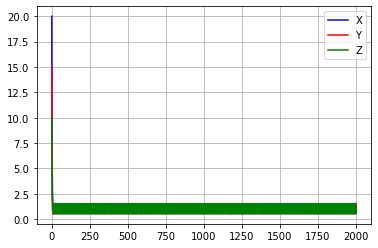

In [6]:
initial_values_c = [20,15,10]
model_c = calculator(initial_values_c,2000, 6)
model_c.calc()

fig_c,axarr_c=plt.subplots()
axarr_c.plot(model_c.time,model_c.X,'-b',label='X')
axarr_c.plot(model_c.time,model_c.Y,'-r',label='Y')
axarr_c.plot(model_c.time,model_c.Z,'-g',label='Z')
axarr_c.legend()
axarr_c.grid(True)

We see that even for relatively large initial values, we enter the same limit cycle. This means our limit cycle must allow for 2 orientations.